# Aim:  Categorize the countries using various socio-economic and health factors that determine the overall development of the country

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Import the data
cd = pd.read_csv("Country-data.csv")

# top 5 records of dataframe
cd.head()  

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
cd.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [5]:
cd.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [6]:
cd.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
cd['country'].count()

167

In [3]:
#grouping the features
features = [
    'child_mort', 'exports', 'health','imports',
    'income', 'inflation', 'life_expec', 'total_fer',
    'gdpp'
]

# EDA

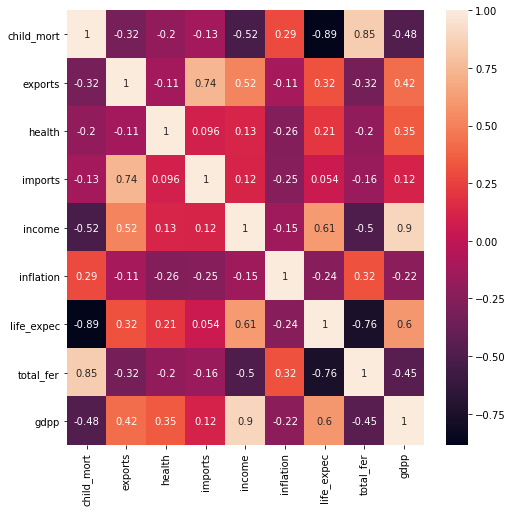

In [9]:
#Correlation of variables
plt.figure(figsize=(8,8))
corr = cd.corr()
sns.heatmap(cd.corr(),annot=True)
plt.show()

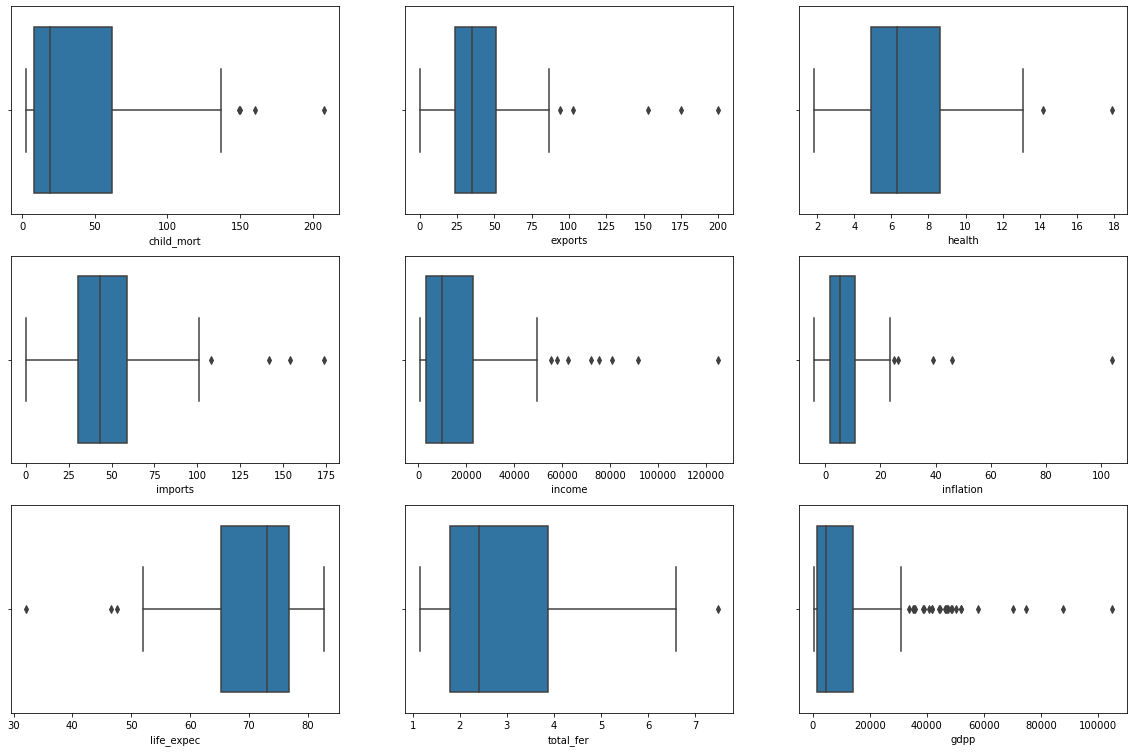

In [10]:
#boxplot of variables
fig,axs=plt.subplots(3,3,figsize=(20,13))
col=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
ax=axs.flatten()
for i,j in enumerate(col):
    sns.boxplot(x=cd[j],ax=ax[i])

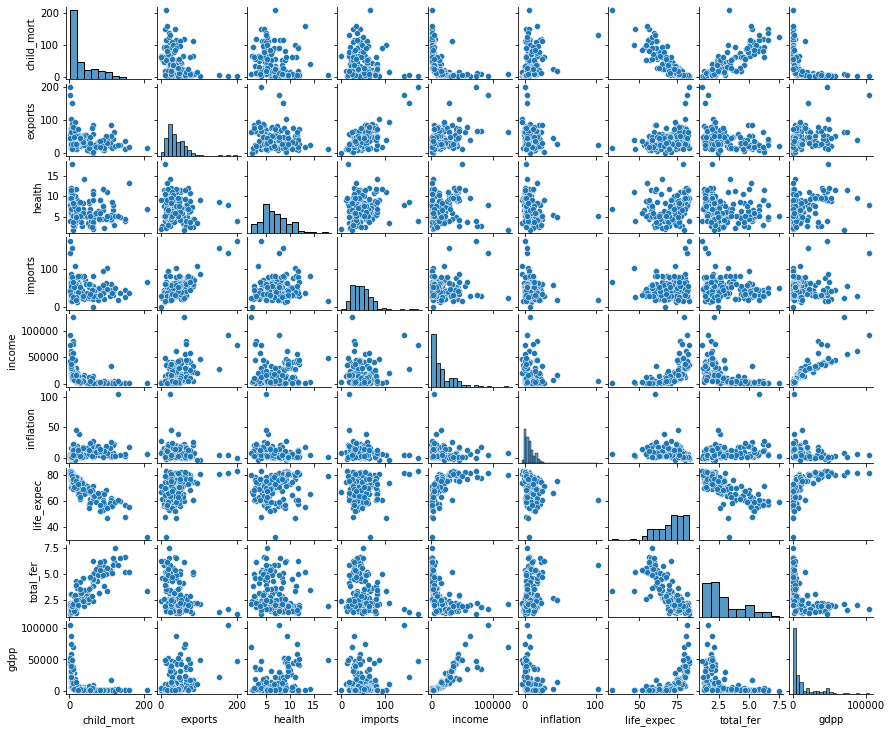

In [11]:
#Comparing the relationship between features
g = sns.pairplot(cd[features])
g.fig.set_size_inches(12,10)

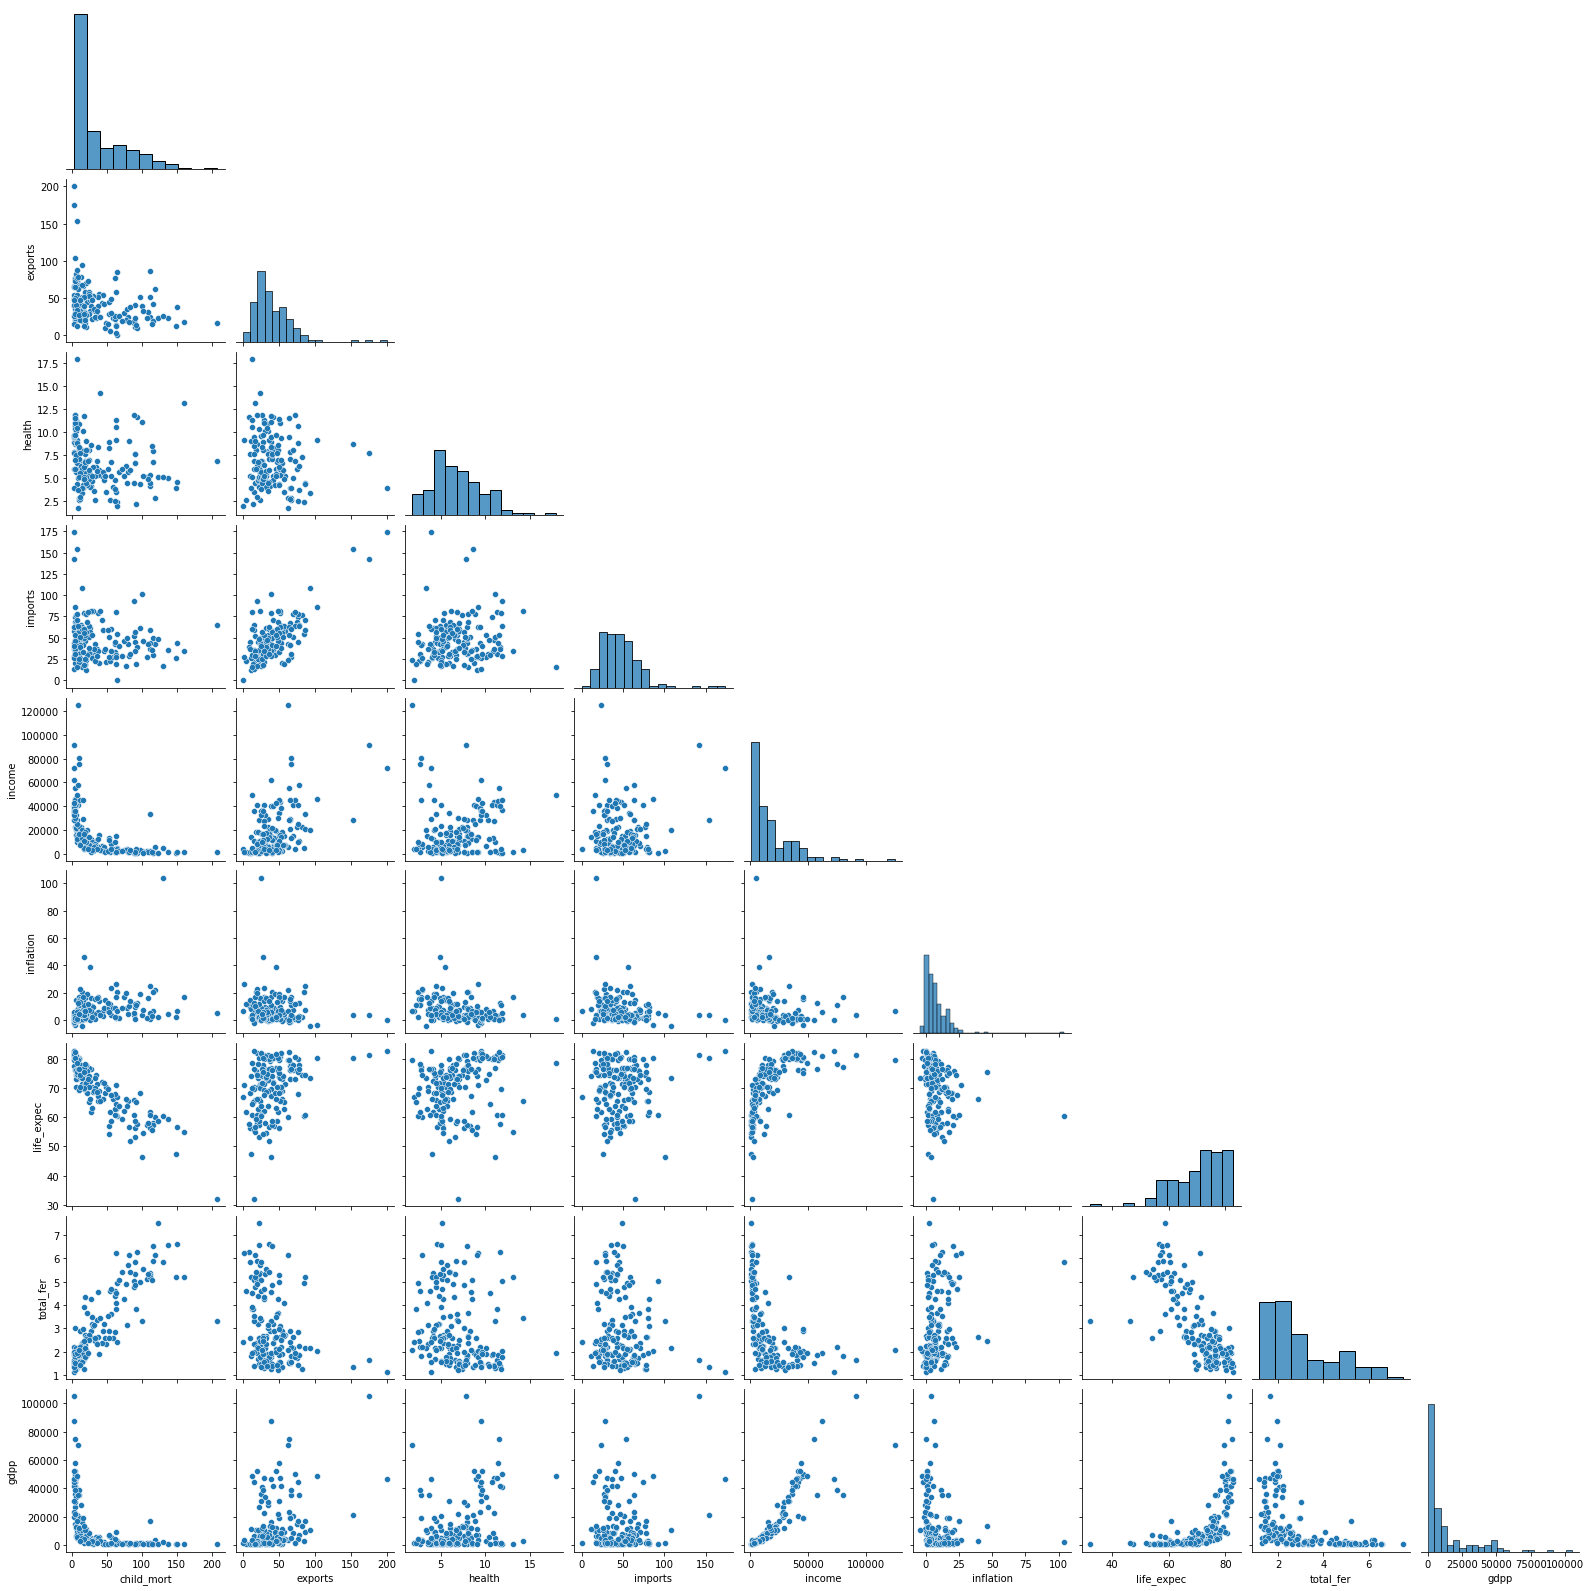

In [12]:
sns.pairplot(cd, corner =True)

**Data Preperation**

In [9]:
#Predictor Attributes
X=cd.iloc[:, [1,2,3,4,5,6,7,8,9]].values

# Build K-means Model

**using elbow method**

In [10]:
# import kMean from sklean
from sklearn.cluster import KMeans

C:\Users\ruffi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

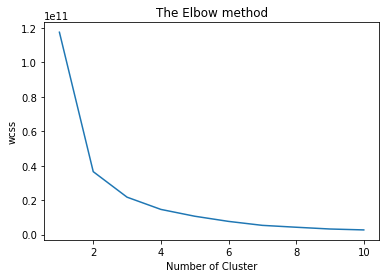

In [11]:
# plot elbow method graph
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show

# k value = 3

In [12]:
# applying the cluster method
# k value = 3
kmeans = KMeans(n_clusters= 3, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [13]:
# predict the cluster
y_kmeans = kmeans.fit_predict(X)

In [14]:
# print the centroids points
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[4.73898437e+01 3.58656172e+01 6.33203125e+00 4.59216086e+01
  8.56924219e+03 8.95764844e+00 6.78734375e+01 3.26335938e+00
  4.43839063e+03]
 [6.22857143e+00 9.64428571e+01 5.71285714e+00 6.85714286e+01
  8.03428571e+04 6.38871429e+00 8.02857143e+01 1.76714286e+00
  6.54428571e+04]
 [8.80000000e+00 4.99781250e+01 8.99156250e+00 4.60218750e+01
  3.76218750e+04 3.38331250e+00 7.91562500e+01 1.94468750e+00
  3.55875000e+04]]


In [15]:
#Assign each country to cluster group
from pandas import Series, DataFrame
cd['cluster group'] = Series(y_kmeans, index=cd.index)
cd

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  cluster group  
0         9.44        56.2       5.82    553              1  
1         4.49        76.3       1.65   4090              1  
2        16.10        76.5       2.89   4460              1  
3        22.40        60.1       6.16   3530              1  
4         1.44        76.8       2.13  12200              1  
..         ...         ...        ...    ...            ...  
162       2.62        63.0       3.50   2970              1  
163      45.90        75.4       2.47  13500              1  
164      12.10        73.1       1.95   1310              1  
165      23.60        67.5       4.67   1310              1  
166      14.00        52.0       5.40   1460              1  

[167 rows x 11 columns]

In [17]:
# print number of instances in each cluster group
cd['cluster group'].value_counts()

1    128
2     32
0      7
Name: cluster group, dtype: int64

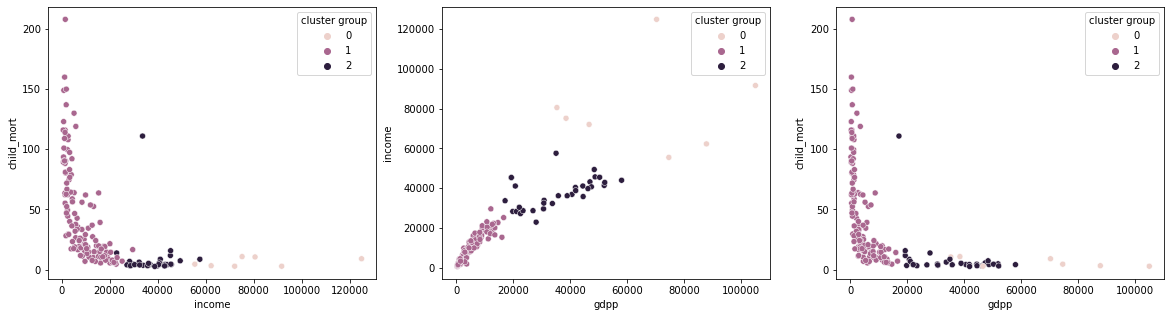

In [18]:
#Visualizing the clusters - K-Means
f, axes = plt.subplots(1, 3, figsize=(20,5))
sns.scatterplot(x='income', y='child_mort', hue='cluster group', data=cd,ax=axes[0]);
sns.scatterplot(x='gdpp', y='income', hue='cluster group', data=cd,ax=axes[1]);
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster group', data=cd,ax=axes[2]);

# Build hierarchical  Model

**using dendrogram method**

In [10]:
# plot the dendrogram 
import scipy.cluster.hierarchy as sch

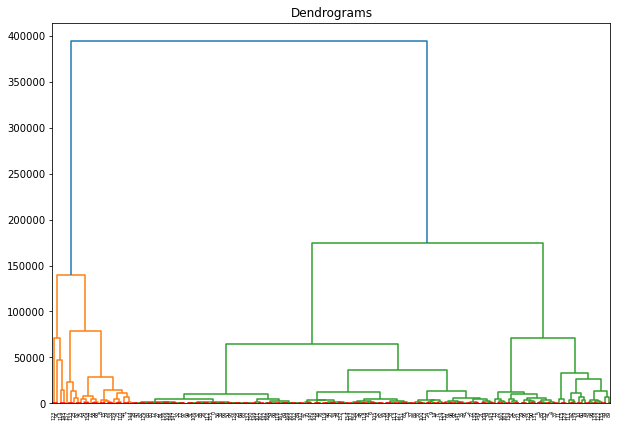

In [20]:
# make a dendrogram using ward method 
plt.figure(figsize=(10, 7)) 
plt.title("Dendrograms") 
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [11]:
# import the agglomerative/hierarchical cluster from scikit learn 
from sklearn.cluster import AgglomerativeClustering

In [12]:
# init the model
hc= AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [13]:
# fit and predict 
y_hc = hc.fit_predict(X)
y_hc

array([2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2], dtype=int64)

In [14]:
#Assign each country to cluster group
from pandas import Series, DataFrame
cd['cluster group'] = Series(y_hc, index=cd.index)
cd.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster group  
0       9.44        56.2       5.82    553              2  
1       4.49        76.3       1.65   4090              2  
2      16.10        76.5       2.89   4460              2  
3      22.40        60.1       6.16   3530              2  
4       1.44        76.8       2.13  12200              1

In [15]:
# print number of instances in each cluster group
cd['cluster group'].value_counts()

2    108
1     35
0     24
Name: cluster group, dtype: int64

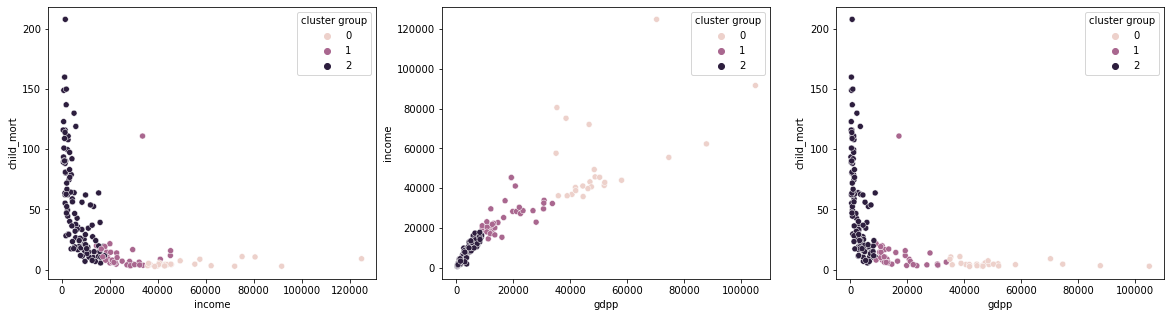

In [16]:
#Visualizing the clusters - Hierarchical 
f, axes = plt.subplots(1, 3, figsize=(20,5))
sns.scatterplot(x='income', y='child_mort', hue='cluster group', data=cd,ax=axes[0]);
sns.scatterplot(x='gdpp', y='income', hue='cluster group', data=cd,ax=axes[1]);
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster group', data=cd,ax=axes[2]);

In [18]:
#Hierarchical Cluster grp 0 = Developed
top5_HC = cd[cd['cluster group'] ==0].sort_values(by = ['income', 'gdpp', 'child_mort'], ascending = [True, True, False]).head()
top5_HC.reset_index(drop=True)

country  child_mort  exports  health  imports  income  inflation  \
0           Japan         3.2     15.0    9.49     13.6   35800     -1.900   
1           Italy         4.0     25.2    9.53     27.2   36200      0.319   
2  United Kingdom         5.2     28.2    9.64     30.8   36200      1.570   
3          France         4.2     26.8   11.90     28.1   36900      1.050   
4         Iceland         2.6     53.4    9.40     43.3   38800      5.470   

   life_expec  total_fer   gdpp  cluster group  
0        82.8       1.39  44500              0  
1        81.7       1.46  35800              0  
2        80.3       1.92  38900              0  
3        81.4       2.03  40600              0  
4        82.0       2.20  41900              0

In [19]:
#Hierarchical Cluster grp 1 = Developing
top5_HC = cd[cd['cluster group'] ==1].sort_values(by = ['income', 'gdpp', 'child_mort'], ascending = [True, True, False]).head()
top5_HC.reset_index(drop=True)

country  child_mort  exports  health  imports  income  inflation  \
0     Brazil        19.8     10.7    9.01     11.8   14500      8.410   
1   Barbados        14.2     39.5    7.97     48.7   15300      0.321   
2  Venezuela        17.1     28.5    4.91     17.6   16500     45.900   
3    Uruguay        10.6     26.3    8.35     25.4   17100      4.910   
4     Turkey        19.1     20.4    6.74     25.5   18000      7.010   

   life_expec  total_fer   gdpp  cluster group  
0        74.2       1.80  11200              1  
1        76.7       1.78  16000              1  
2        75.4       2.47  13500              1  
3        76.4       2.08  11900              1  
4        78.2       2.15  10700              1

In [20]:
#Hierarchical Cluster grp 2 = UnderDeveloped
top5_HC = cd[cd['cluster group'] ==2].sort_values(by = ['income', 'gdpp', 'child_mort'], ascending = [True, True, False]).head()
top5_HC.reset_index(drop=True)

country  child_mort  exports  health  imports  income  \
0          Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
1                   Liberia        89.3    19.10   11.80     92.6     700   
2                   Burundi        93.6     8.92   11.60     39.2     764   
3                     Niger       123.0    22.20    5.16     49.1     814   
4  Central African Republic       149.0    11.80    3.98     26.5     888   

   inflation  life_expec  total_fer  gdpp  cluster group  
0      20.80        57.5       6.54   334              2  
1       5.47        60.8       5.02   327              2  
2      12.30        57.7       6.26   231              2  
3       2.55        58.8       7.49   348              2  
4       2.01        47.5       5.21   446              2